# Start working on simulation of depth/30000 environment

In [156]:
import pandas as pd
import hvplot.pandas

import holoviews as hv
import xarray as xr
from tqdm import tqdm
from matplotlib import pyplot as plt

from oceans.sw_extras import sw_extras as sw
import pickle

from pyat_tools import pyat_tools
import numpy as np
import scipy
from scipy import signal

In [2]:
fn = '/datadrive/DAS/south_DAS_latlondepth.txt'
df = pd.read_csv(fn)

In [3]:
df.hvplot(x='index', y='depth')

:Curve   [index]   (depth)

In [12]:
df_slice = df[30000-942:30100-942]

In [15]:
df_slice.mean()

index    30049.500000
lat         45.184329
lon       -124.702575
depth     -546.549989
dtype: float64

### Download HYCOM data

In [46]:
files = [
    'ftp://ftp.hycom.org/datasets/GLBy0.08/expt_93.0/data/hindcasts/2021/hycom_glby_930_2021110112_t000_ts3z.nc',
    'ftp://ftp.hycom.org/datasets/GLBy0.08/expt_93.0/data/hindcasts/2021/hycom_glby_930_2021110112_t003_ts3z.nc',
    'ftp://ftp.hycom.org/datasets/GLBy0.08/expt_93.0/data/hindcasts/2021/hycom_glby_930_2021110112_t006_ts3z.nc',
    'ftp://ftp.hycom.org/datasets/GLBy0.08/expt_93.0/data/hindcasts/2021/hycom_glby_930_2021110112_t009_ts3z.nc',
    'ftp://ftp.hycom.org/datasets/GLBy0.08/expt_93.0/data/hindcasts/2021/hycom_glby_930_2021110112_t012_ts3z.nc',
    'ftp://ftp.hycom.org/datasets/GLBy0.08/expt_93.0/data/hindcasts/2021/hycom_glby_930_2021110112_t015_ts3z.nc',
    'ftp://ftp.hycom.org/datasets/GLBy0.08/expt_93.0/data/hindcasts/2021/hycom_glby_930_2021110112_t018_ts3z.nc',
    'ftp://ftp.hycom.org/datasets/GLBy0.08/expt_93.0/data/hindcasts/2021/hycom_glby_930_2021110112_t021_ts3z.nc',
    'ftp://ftp.hycom.org/datasets/GLBy0.08/expt_93.0/data/hindcasts/2021/hycom_glby_930_2021110212_t000_ts3z.nc',
    'ftp://ftp.hycom.org/datasets/GLBy0.08/expt_93.0/data/hindcasts/2021/hycom_glby_930_2021110212_t003_ts3z.nc',
    'ftp://ftp.hycom.org/datasets/GLBy0.08/expt_93.0/data/hindcasts/2021/hycom_glby_930_2021110212_t006_ts3z.nc',
    'ftp://ftp.hycom.org/datasets/GLBy0.08/expt_93.0/data/hindcasts/2021/hycom_glby_930_2021110212_t009_ts3z.nc',
    'ftp://ftp.hycom.org/datasets/GLBy0.08/expt_93.0/data/hindcasts/2021/hycom_glby_930_2021110212_t012_ts3z.nc',
    'ftp://ftp.hycom.org/datasets/GLBy0.08/expt_93.0/data/hindcasts/2021/hycom_glby_930_2021110212_t015_ts3z.nc',
    'ftp://ftp.hycom.org/datasets/GLBy0.08/expt_93.0/data/hindcasts/2021/hycom_glby_930_2021110212_t018_ts3z.nc',
    'ftp://ftp.hycom.org/datasets/GLBy0.08/expt_93.0/data/hindcasts/2021/hycom_glby_930_2021110212_t021_ts3z.nc',
    'ftp://ftp.hycom.org/datasets/GLBy0.08/expt_93.0/data/hindcasts/2021/hycom_glby_930_2021110312_t000_ts3z.nc',
    'ftp://ftp.hycom.org/datasets/GLBy0.08/expt_93.0/data/hindcasts/2021/hycom_glby_930_2021110312_t003_ts3z.nc',
    'ftp://ftp.hycom.org/datasets/GLBy0.08/expt_93.0/data/hindcasts/2021/hycom_glby_930_2021110312_t006_ts3z.nc',
    'ftp://ftp.hycom.org/datasets/GLBy0.08/expt_93.0/data/hindcasts/2021/hycom_glby_930_2021110312_t009_ts3z.nc',
    'ftp://ftp.hycom.org/datasets/GLBy0.08/expt_93.0/data/hindcasts/2021/hycom_glby_930_2021110312_t012_ts3z.nc',
    'ftp://ftp.hycom.org/datasets/GLBy0.08/expt_93.0/data/hindcasts/2021/hycom_glby_930_2021110312_t015_ts3z.nc',
    'ftp://ftp.hycom.org/datasets/GLBy0.08/expt_93.0/data/hindcasts/2021/hycom_glby_930_2021110312_t018_ts3z.nc',
    'ftp://ftp.hycom.org/datasets/GLBy0.08/expt_93.0/data/hindcasts/2021/hycom_glby_930_2021110312_t021_ts3z.nc',
    'ftp://ftp.hycom.org/datasets/GLBy0.08/expt_93.0/data/hindcasts/2021/hycom_glby_930_2021110412_t000_ts3z.nc',
    'ftp://ftp.hycom.org/datasets/GLBy0.08/expt_93.0/data/hindcasts/2021/hycom_glby_930_2021110412_t003_ts3z.nc',
    'ftp://ftp.hycom.org/datasets/GLBy0.08/expt_93.0/data/hindcasts/2021/hycom_glby_930_2021110412_t006_ts3z.nc',
    'ftp://ftp.hycom.org/datasets/GLBy0.08/expt_93.0/data/hindcasts/2021/hycom_glby_930_2021110412_t009_ts3z.nc',
    'ftp://ftp.hycom.org/datasets/GLBy0.08/expt_93.0/data/hindcasts/2021/hycom_glby_930_2021110412_t012_ts3z.nc',
    'ftp://ftp.hycom.org/datasets/GLBy0.08/expt_93.0/data/hindcasts/2021/hycom_glby_930_2021110412_t015_ts3z.nc',
    'ftp://ftp.hycom.org/datasets/GLBy0.08/expt_93.0/data/hindcasts/2021/hycom_glby_930_2021110412_t018_ts3z.nc',
    'ftp://ftp.hycom.org/datasets/GLBy0.08/expt_93.0/data/hindcasts/2021/hycom_glby_930_2021110412_t021_ts3z.nc',
]

thredds_base = 'https://tds.hycom.org/thredds/dodsC'
midpoint = (df_slice.mean().lat, df_slice.mean().lon)

for file in tqdm(files):
    file_path = thredds_base + file[19:]
    file_name = file[-38:]
    
    ds = xr.open_dataset(thredds_base + file[19:], decode_times=False).sel({'lat':midpoint[0], 'lon':midpoint[1]+360}, method='nearest')
    ds.to_netcdf(f'/datadrive/HYCOM_data/DAS_30000/{file_name}')
    

100%|███████████████████████████████████████████| 32/32 [04:29<00:00,  8.42s/it]


### look at hycom data

In [107]:
ds = xr.open_mfdataset('/datadrive/HYCOM_data/DAS_30000/*.nc', decode_times=False).mean('time', keepdims=True)
sspx = sw.soundspeed(ds.salinity, ds.water_temp, ds.depth)

In [ ]:
ssp = pyat_tools.convert_SSP_arlpy(sspx, 0)
ssp = np.vstack((ssp, ssp[-1,:]))[1:]
ssp[-1,0] = 600

Text(0.5, 1.0, 'average sound speed')

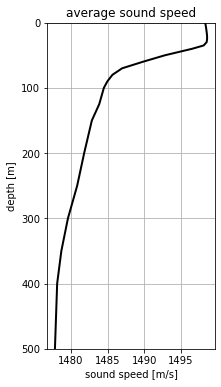

In [75]:
plt.figure(figsize=(3,6))
plt.plot(ssp, ssp.depth, 'k', linewidth=2)
plt.ylim([500,0])

plt.grid()
plt.xlabel('sound speed [m/s]')
plt.ylabel('depth [m]')

plt.title('average sound speed')

## Look at Simulation

In [175]:
fn = '/datadrive/simulation/DAS/30000_env.pkl'

with open(fn, 'rb') as f:
    p = pickle.load(f)

In [177]:
b,a = signal.butter(4, btype='bandpass', Wn=[0.15, 0.25])

In [203]:
p_filt = signal.filtfilt(b,a,p,axis=0)
p_c = np.abs(signal.hilbert(p_filt, axis=0))

Text(0, 0.5, 'distance [km]')

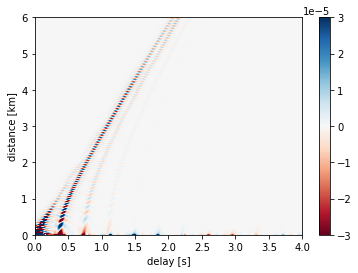

In [201]:
plt.imshow(p_filt.T,  aspect='auto', extent=(0,15, 6,0), cmap='RdBu', vmax=0.00003, vmin=-0.00003)
plt.colorbar()
plt.xlim([0,4])
plt.ylim([0,6])
plt.xlabel('delay [s]')
plt.ylabel('distance [km]')

Text(0, 0.5, 'distance [km]')

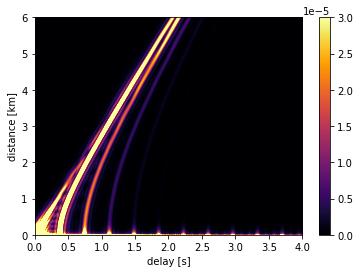

In [207]:
plt.imshow(p_c.T,  aspect='auto', extent=(0,15, 6,0), cmap='inferno', vmax=0.00003, vmin=0)
plt.colorbar()
plt.xlim([0,4])
plt.ylim([0,6])
plt.xlabel('delay [s]')
plt.ylabel('distance [km]')

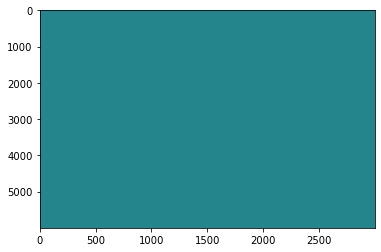

In [181]:
plt.imshow(pt_filt, aspect='auto')